In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sympy import symbols, diff
import pandas as pd
import csv

In [ ]:
'''
Defining measurements and uncertainties for L.
'''

#for c formula
L_total=37.685 #maybe not even necessary.
L_hallway=32.025
u_L_h=0.105
L_mirror=5.66
u_L_m=0.02
u_h_o=0.005

#for focal length f
L_focal_hallway=25.925
u_L_fh=0.0425

In [ ]:
'''
Load data
'''

path="/content/drive/MyDrive/Lab Physics/Lab 3/Lab 3 Cleaned Fixed.csv"

def load_data(path):
  data = np.genfromtxt(path, delimiter=",", skip_header=1)

  delta_f_day1 = data[:, 0][~np.isnan(data[:, 0])]
  d_day1 = data[:, 1][~np.isnan(data[:, 1])]
  delta_f_day2 = data[:, 2][~np.isnan(data[:, 2])]
  d_day2 = data[:, 3][~np.isnan(data[:, 3])]
  h_i = data[:, 4][~np.isnan(data[:, 4])]
  h_o = data[:, 5][~np.isnan(data[:, 5])]

  return delta_f_day1, d_day1, delta_f_day2, d_day2, h_i, h_o

delta_f_day1, d_day1, delta_f_day2, d_day2, h_i, h_o = load_data(path)

delta_f_day1=np.array(delta_f_day1)
d_day1=np.array(d_day1)
delta_f_day2=np.array(delta_f_day2)
d_day2=np.array(d_day2)
h_i=np.array(h_i)
h_o=np.array(h_o)

print(f"h_i: {h_i}, h_o: {h_o}")

h_i: [0.00187641 0.00187641 0.00187641], h_o: [0.11 0.11 0.11]


In [ ]:
def find_focal_length(h_i, h_o):
  M=[]
  for i in range(3):
    M_calc = h_i[i] / h_o[i]
    M.append(M_calc)
  M=np.array(M)

  focal_length = (M * L_focal_hallway) / (1 + M)
  return focal_length

focal_length=find_focal_length(h_i, h_o)

def u_focal_length(h_i, h_o, u_L_fh):
  h_i1, h_o1, L_fh = symbols('h_i1 h_o1 L_fh', real = True)

  M = h_i1 / h_o1
  f = (M * L_fh) / (1 + M)

  '''
  Taking partials
  '''
  df_dh_i = diff(f, h_i1)
  df_dh_o = diff(f, h_o1)
  df_L_fh = diff(f, L_fh)


  '''
  Since h_i depends on what the individual making the measurement deems as "the true value," I think it is reasonable to say that u is 10% of what value is recorded to be.
  '''
  u_h_i = 0.1 * h_i

  '''
  Substituting in values
  '''
  u_h_o = 0.005
  L_focal_hallway = 25.925
  u_f = []
  for i in range(3):
    df_dh_i_value = float(df_dh_i.subs({h_i1:h_i[i], h_o1:h_o[i], L_fh: L_focal_hallway}).evalf())
    df_dh_o_value = float(df_dh_o.subs({h_i1:h_i[i], h_o1:h_o[i], L_fh: L_focal_hallway}).evalf())
    df_L_fh_value = float(df_L_fh.subs({h_i1:h_i[i], h_o1:h_o[i], L_fh: L_focal_hallway}).evalf())

    u_f_value = np.sqrt((u_h_i[i])**2 * (df_dh_i_value)**2 + (u_h_o)**2 * (df_dh_o_value)**2 + (u_L_fh)**2 * (df_L_fh_value)**2)
    u_f.append(u_f_value)
  u_f = np.array(u_f)
  return u_f

u_f = u_focal_length(h_i, h_o, u_L_fh)
print(f"The values of uncertainty for the focal length f: {u_f}")
print()

print(f"The calculated values of the focal length f with the associated uncertainty values are:")
for i in range(3):
  print(f"{focal_length[i]}m ± {u_f[i]}m")

'''
The equalness of the results may seem weird, but during our data collection, I and Dylan took turn recording data and we had the same measurements,
so this is expected. We can then claim that the weighted average will be identical.
'''
print()
print(f"Therefore our final measurement of the focal length f is (0.43±0.05)m")
print()

'''
As a way of justifying the focal length value, I will do a percent error comparison with the focal length in the user manual.
'''

actual_focal_length = 0.445
focal_length = 0.43
u_f = 0.05


def percent_error_f():
  percent_error_f = np.abs((focal_length - actual_focal_length) / actual_focal_length) * 100
  return percent_error_f

percent_error_f = percent_error_f()
print(f"The percent error present in the focal length value is")
print(f"{percent_error_f}%")

The values of uncertainty for the focal length f: [0.04696727 0.04696727 0.04696727]

The calculated values of the focal length f with the associated uncertainty values are:
0.434817854398073m ± 0.04696726900298215m
0.434817854398073m ± 0.04696726900298215m
0.434817854398073m ± 0.04696726900298215m

Therefore our final measurement of the focal length f is (0.43±0.05)m

The percent error present in the focal length value is
3.3707865168539355%


In [ ]:
'''
Since the weighted average calculation does not make a difference in the final measurement for focal length f,
I will define f and u_f as the final measurement above.
'''
focal_length = 0.43
u_f = 0.05

def find_c(delta_f_day1, delta_f_day2):
  c_day1 = []
  c_day2 = []

  for i in range(len(delta_f_day1)):
    c_day1_value = (4 * (L_hallway + L_mirror) * focal_length * delta_f_day1[i]) / d_day1[i]
    c_day1.append(c_day1_value)

  for i in range(len(delta_f_day2)):
    c_day2_value = (4 * (L_hallway + L_hallway + L_mirror) * focal_length * delta_f_day2[i]) / d_day2[i]
    c_day2.append(c_day2_value)

  c_day1 = np.array(c_day1)
  c_day2 = np.array(c_day2)

  return c_day1, c_day2

c_day1, c_day2 = find_c(delta_f_day1, delta_f_day2)

#print(len(delta_f_day1))
#print(len(delta_f_day2))
#print(len(d_day1))
#print(len(d_day2))

print(f"Calculated values of c for day 1: {c_day1}")
print(f"Calculated values of c for day 2: {c_day2}")
print()

'''
Before calculating for the uncertainty values for c, we need to first define the uncertainty values for the uncertainty in w (delta_f_day_1, delta_f_day_2) and d (d_day1, d_day2).

Necessary for uncertainty propagation formula.

I think a 10% error statement is fairly consistent with what was seen in the lab, for for w and d.
'''
u_w_1 = 0.1 * delta_f_day1
u_w_2 = 0.1 * delta_f_day2

u_d_1 = 0.1 * d_day1
u_d_2 = 0.1 * d_day2

'''
Propagation-based uncertainty analysis function.
'''
def u_c(c_day1, c_day2):
  L_hallway1, L_mirror1, focal_length1, delta_f_day1_1, d_day1_1, delta_f_day2_1, d_day2_1 = symbols('L_hallway1 L_mirror1 focal_length1 delta_f_day1_1 d_day1_1 delta_f_day2_1 d_day2_1', real = True)

  c_day1_value = (4 * (L_hallway1 + L_mirror1) * focal_length1 * delta_f_day1_1) / d_day1_1
  c_day2_value = (4 * (L_hallway1 + L_hallway1 + L_mirror1) * focal_length1 * delta_f_day2_1) / d_day2_1

  '''
  Taking partials for day 1
  '''
  dc1_d_L_hallway = diff(c_day1_value, L_hallway1)
  dc1_d_L_mirror = diff(c_day1_value, L_mirror1)
  dc1_d_focal_length = diff(c_day1_value, focal_length1)
  dc1_d_delta_f_day1 = diff(c_day1_value, delta_f_day1_1)
  dc1_d_day1 = diff(c_day1_value, d_day1_1)

  u_c1 = []

  for i in range(10): #10 because 10 values
    dc1_d_L_hallway_value = float(dc1_d_L_hallway.subs({L_hallway1:L_hallway, L_mirror1:L_mirror, focal_length1:focal_length, delta_f_day1_1:delta_f_day1[i], d_day1_1:d_day1[i]}).evalf())
    dc1_d_L_mirror_value = float(dc1_d_L_mirror.subs({L_hallway1:L_hallway, L_mirror1:L_mirror, focal_length1:focal_length, delta_f_day1_1:delta_f_day1[i], d_day1_1:d_day1[i]}).evalf())
    dc1_d_focal_length_value = float(dc1_d_focal_length.subs({L_hallway1:L_hallway, L_mirror1:L_mirror, focal_length1:focal_length, delta_f_day1_1:delta_f_day1[i], d_day1_1:d_day1[i]}).evalf())
    dc1_d_delta_f_day1_value = float(dc1_d_delta_f_day1.subs({L_hallway1:L_hallway, L_mirror1:L_mirror, focal_length1:focal_length, delta_f_day1_1:delta_f_day1[i], d_day1_1:d_day1[i]}).evalf())
    dc1_d_day1_value = float(dc1_d_day1.subs({L_hallway1:L_hallway, L_mirror1:L_mirror, focal_length1:focal_length, delta_f_day1_1:delta_f_day1[i], d_day1_1:d_day1[i]}).evalf())

    u_c1_value = np.sqrt((u_L_h)**2 * (dc1_d_L_hallway_value)**2 + (u_L_m)**2 * (dc1_d_L_mirror_value)**2 + (u_f)**2 * (dc1_d_focal_length_value)**2 + (u_w_1[i])**2 * (dc1_d_delta_f_day1_value)**2 + (u_d_1[i])**2 * (dc1_d_day1_value)**2)
    u_c1.append(u_c1_value)
  u_c1 = np.array(u_c1)

  '''
  Taking partials for day 2
  '''
  dc2_d_L_hallway = diff(c_day2_value, L_hallway1)
  dc2_d_L_mirror = diff(c_day2_value, L_mirror1)
  dc2_d_focal_length = diff(c_day2_value, focal_length1)
  dc2_d_delta_f_day2 = diff(c_day2_value, delta_f_day2_1)
  dc2_d_day2 = diff(c_day2_value, d_day2_1)

  u_c2 = []

  for i in range(4): #4 because 4 values
    dc2_d_L_hallway_value = float(dc2_d_L_hallway.subs({L_hallway1: L_hallway, L_mirror1: L_mirror, focal_length1: focal_length, delta_f_day2_1: delta_f_day2[i], d_day2_1: d_day2[i]}).evalf())
    dc2_d_L_mirror_value = float(dc2_d_L_mirror.subs({L_hallway1: L_hallway, L_mirror1: L_mirror, focal_length1: focal_length, delta_f_day2_1: delta_f_day2[i], d_day2_1: d_day2[i]}).evalf())
    dc2_d_focal_length_value = float(dc2_d_focal_length.subs({L_hallway1: L_hallway, L_mirror1: L_mirror, focal_length1: focal_length, delta_f_day2_1: delta_f_day2[i], d_day2_1: d_day2[i]}).evalf())
    dc2_d_delta_f_day2_value = float(dc2_d_delta_f_day2.subs({L_hallway1:L_hallway, L_mirror1:L_mirror, focal_length1:focal_length, delta_f_day2_1:delta_f_day2[i], d_day2_1:d_day2[i]}).evalf())
    dc2_d_day2_value = float(dc2_d_day2.subs({L_hallway1:L_hallway, L_mirror1:L_mirror, focal_length1:focal_length, delta_f_day2_1:delta_f_day2[i], d_day2_1:d_day2[i]}).evalf())

    u_c2_value = np.sqrt((u_L_h)**2 * (dc2_d_L_hallway_value)**2 + (u_L_m)**2 * (dc2_d_L_mirror_value)**2 + (u_f)**2 * (dc2_d_focal_length_value)**2 + (u_w_2[i])**2 * (dc2_d_delta_f_day2_value)**2 + (u_d_2[i])**2 * (dc2_d_day2_value)**2)
    u_c2.append(u_c2_value)
  u_c2 = np.array(u_c2)

  return u_c1, u_c2

u_c1, u_c2 = u_c(c_day1, c_day2)
print(f"Uncertainty values of c for day 1: {u_c1}")
print(f"Uncertainty values of c for day 2: {u_c2}")
print()

print(f"The calculated c and its corresponding uncertainty values for day 1:")
for i in range(10):
  print(f"{c_day1[i]} ± {u_c1[i]}")
print()

print(f"The calculated c and its corresponding uncertainty values for day 2:")
for i in range(4):
  print(f"{c_day2[i]} ± {u_c2[i]}")

Calculated values of c for day 1: [3.08884868e+08 4.02551173e+08 4.02974906e+08 3.58630477e+08
 2.86095916e+08 2.57301090e+08 3.20770910e+08 3.29103788e+08
 3.16088363e+08 4.40673952e+08]
Calculated values of c for day 2: [2.30439975e+08 4.28972877e+08 5.08432984e+08 2.83560313e+08]

Uncertainty values of c for day 1: [56559566.4169334  73710699.94713217 73788289.29886508 65668429.94453692
 52386706.61925557 47114117.94139585 58736006.41329771 60261830.51182872
 57878590.51410524 80691319.73433276]
Uncertainty values of c for day 2: [42196308.96791745 78550052.06691654 93100145.70745435 51923276.55396532]

The calculated c and its corresponding uncertainty values for day 1:
308884867.8260838 ± 56559566.4169334
402551173.0889345 ± 73710699.94713217
402974906.47610474 ± 73788289.29886508
358630477.36681193 ± 65668429.944536924
286095915.7757618 ± 52386706.619255565
257301090.07189277 ± 47114117.94139585
320770909.8026559 ± 58736006.413297705
329103787.9496762 ± 60261830.51182872
31608836

In [ ]:
'''
Weighted average calculations for day 1 and day 2.
'''
def calculate_weighted_average(c_day1, c_day2, u_c1, u_c2):
  weight1 = 1 / u_c1**2
  c1_mean = np.sum(c_day1 * weight1) / np.sum(weight1)
  u1 = np.sqrt(1 / np.sum(weight1))

  weight2 = 1 / u_c2**2
  c2_mean = np.sum(c_day2 * weight2) / np.sum(weight2)
  u2 = np.sqrt(1 / np.sum(weight2))

  return c1_mean, u1, c2_mean, u2

c1_mean, u1, c2_mean, u2 = calculate_weighted_average(c_day1, c_day2, u_c1, u_c2)

print(f"The weighted average output of the calculation of c from day 1 and day 2 with their associated uncertainty values, and units m/s:")
print(f"Day 1: {c1_mean} ± {u1}")
print(f"Day 2: {c2_mean} ± {u2}")
print()

'''
We now take the final weighted average to reach our final presented value for the speed of light c and its uncertainty.

I will make two separate arrays that include the c values from day 1 and 2 and their associated uncertainty values.
'''
c_final = [c1_mean, c2_mean]
u_final = [u1, u2]
c_final = np.array(c_final)
u_final = np.array(u_final)

def final_weighted_average(c_final, u_final):
  weight = 1 / u_final**2
  mean = np.sum(c_final * weight) / np.sum(weight)
  u = np.sqrt(1 / np.sum(weight))

  return mean, u

mean, u = final_weighted_average(c_final, u_final)

print(f"Therefore, our final presented value of c and its uncertainty is, with units m/s")
print(f"{mean} ± {u}")
print()

The weighted average output of the calculation of c from day 1 and day 2 with their associated uncertainty values, and units m/s:
Day 1: 325616080.4806656 ± 19088619.992185187
Day 2: 299822561.2490548 ± 28748090.86584095

Therefore, our final presented value of c and its uncertainty is, with units m/s
317723653.43813795 ± 15902265.3707646



The percent error compared to the actual value of c is
5.981202982143716%


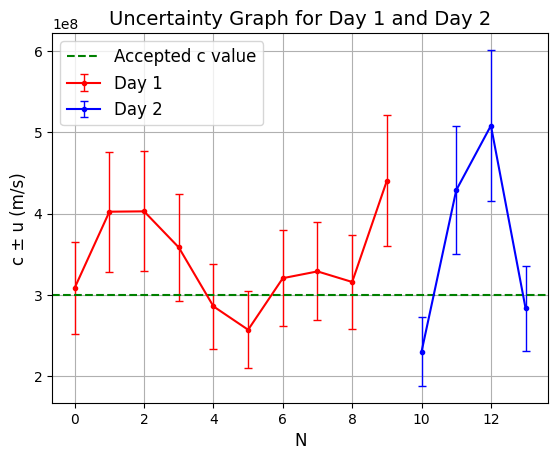

In [ ]:
'''
We need to calculate the percent error now.

From wikpedia:
299792458 m/s
'''
c_actual = 299792458

def calculate_percent_error(mean):
  percent_error = np.abs((mean - c_actual) / c_actual) * 100
  return percent_error

percent_error = calculate_percent_error(mean)
print(f"The percent error compared to the actual value of c is")
print(f"{percent_error}%")

'''
We can now plot the error bar graph to better visualize our measurements of c from day 1 and day 2 compared to the actual value of c.
'''

x_axis_1 = np.arange(0, 10, step=1)
y1=c_day1
y1_1=u_c1

x_axis_2 = np.arange(10, 14, step=1)
y2=c_day2
y2_2=u_c2

fig=plt.figure()
plt.errorbar(x_axis_1, y1, yerr = y1_1, linestyle = "-", marker = "o", markersize = 3, c = 'r', elinewidth = 1, capsize = 3, label = "Day 1")
plt.errorbar(x_axis_2, y2, yerr = y2_2, linestyle = "-", marker = "o", markersize = 3, c = 'b', elinewidth = 1, capsize = 3, label = "Day 2")
plt.axhline(y = c_actual, color = 'g', linestyle = "--", label = "Accepted c value")
plt.title("Uncertainty Graph for Day 1 and Day 2", fontsize = 14)
plt.xlabel("N", fontsize = 12)
plt.ylabel("c ± u (m/s)", fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()